# Pymaceuticals Inc.
---

### Analysis

The information shows the tumor size for 248 mice over the course of 45 days, treated with different drugs. At the end, the Capomulin drug is compared to other treatments, and information regarding this particular drug is presented.

The mouse population is split 51% and 49% between male and female, respectively. 
Capomulin and Ramicane-treated mice exhibit the lowest mean tumor size and the most Timepoints. 
The analysis of mouse ID l509, treated with Capomulin, shows a decrease in tumor size over time. 
The average tumor size has a linear relationship with the mouse weight, with a correlation coefficient of 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
data_df = pd.merge(study_df,mouse_df)

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(data_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mask = data_df.duplicated()
mask
filtered_data_df = data_df[mask]
filtered_data_df['Mouse ID']

861    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_df[data_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df[data_df['Mouse ID'] != 'g989']
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_results = pd.DataFrame({
    'Mean Tumor Volume': clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
})
drug_results

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_results2 = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_results2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

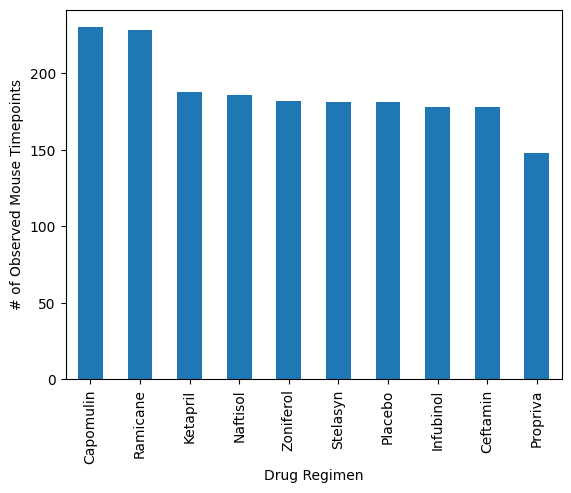

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data_df['Drug Regimen'].value_counts().plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

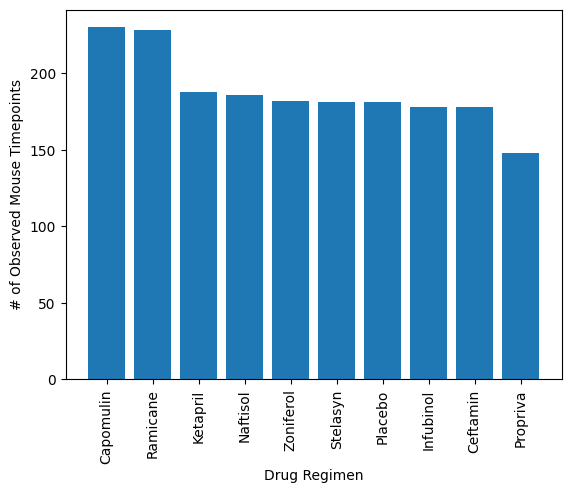

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(clean_data_df['Drug Regimen'].value_counts().index, clean_data_df['Drug Regimen'].value_counts().values)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.gca().set_xlabel('Drug Regimen')
plt.show()

<Axes: ylabel='Sex'>

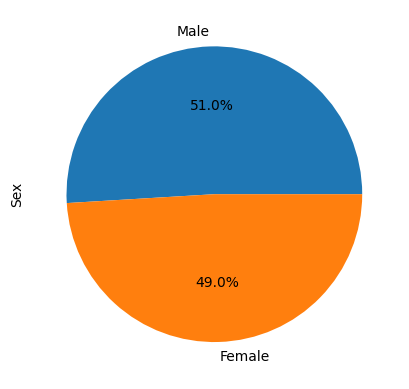

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_data_df['Sex'].value_counts().plot(kind='pie',autopct='%.1f%%')

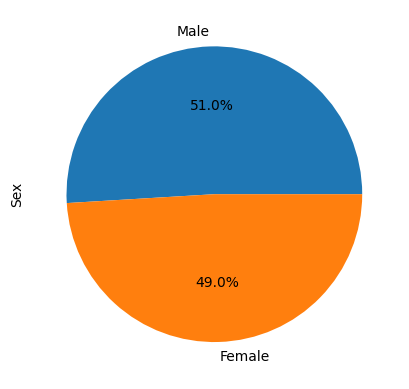

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_data_df['Sex'].value_counts(), autopct='%.1f%%', labels=clean_data_df['Sex'].value_counts().index)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_data_df = clean_data_df[clean_data_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoints = final_data_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumors_df = final_data_df.merge(latest_timepoints, on=['Mouse ID', 'Timepoint'])[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
tumors_df


,Mouse ID,Tumor Volume (mm3),Drug Regimen
0,b128,38.982878,Capomulin
1,c326,36.321346,Infubinol
2,c139,72.226731,Infubinol
3,v339,46.250112,Infubinol
4,a577,57.031862,Infubinol
...,...,...,...
95,t565,34.455298,Capomulin
96,i557,47.685963,Capomulin
97,m957,33.329098,Capomulin
98,f966,30.485985,Capomulin


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_size = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for treatment in treatments:
    subset = tumors_df[tumors_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_size.append(subset)
    quartiles = subset.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    print(f'{treatment} potential outliers: {outliers}')



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


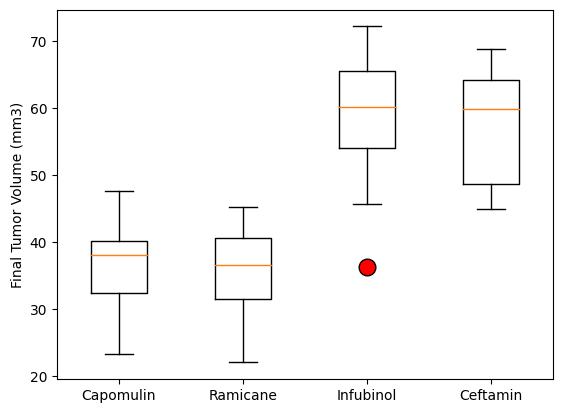

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)
plt.boxplot(tumor_size, labels=treatments, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

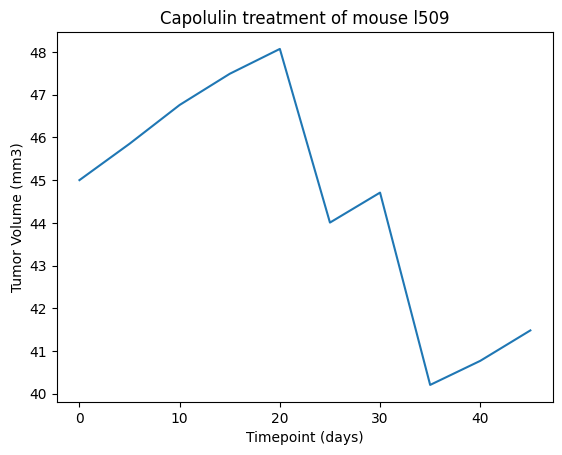

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df = clean_data_df.loc[clean_data_df['Mouse ID'] == 'l509', ['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capolulin treatment of mouse l509')
plt.gca().set_xlabel('Timepoint (days)')
plt.show()

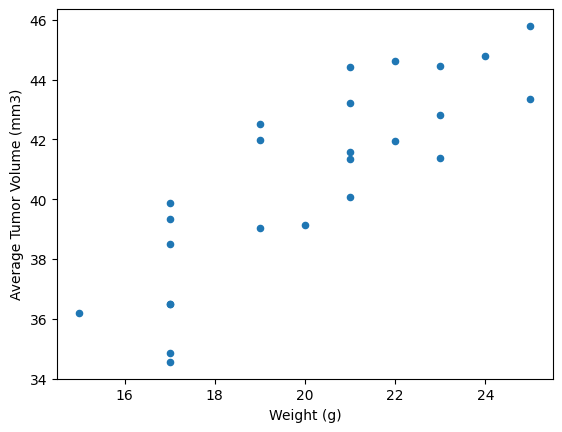

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']

capomulin_results = pd.DataFrame({
    'Mean Tumor Volume': capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean(),
    'Mean Weight': capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
}).plot(kind='scatter', x='Mean Weight',y='Mean Tumor Volume', xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient is 0.84


[Text(0.5, 0, 'Weight (g)'), Text(0, 0.5, 'Average Tumor Volume (mm3)')]

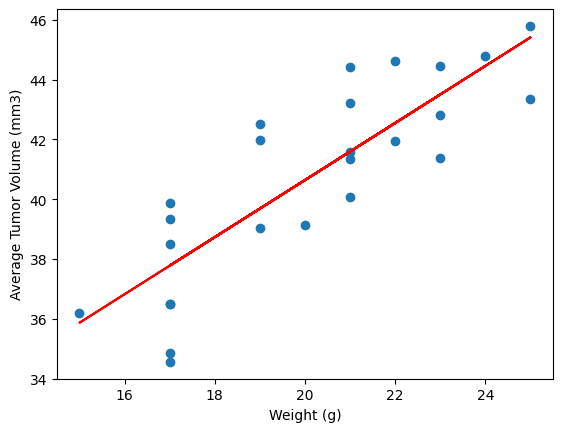

In [18]:
capomulin_results = pd.DataFrame({
    'Mean Tumor Volume': capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean(),
    'Mean Weight': capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
})
capomulin_results

x_values = capomulin_results['Mean Weight']
y_values = capomulin_results['Mean Tumor Volume']
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values,y_values)

line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
y_predict = intercept + (slope * x_values)

# Calculate the correlation coefficient and a linear regression model 
print(f'The correlation coefficient is {round(rvalue,2)}')

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(x_values,y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (5,9,), color='r', fontsize=15)
plt.gca().update(dict(xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'))  #this solution was taken from https://stackoverflow.com/questions/42223587/how-to-add-title-and-xlabel-and-ylabel, by gboffi